In [1]:
pip install k-means-constrained

     |████████████████████████████████| 593kB 284kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 307kB 11.6MB/s eta 0:00:01
     |████████████████████████████████| 13.7MB 29.5MB/s eta 0:00:01    |███▎                            | 1.4MB 27.5MB/s eta 0:00:01     |███████████▌                    | 4.9MB 27.5MB/s eta 0:00:01     |██████████████▏                 | 6.1MB 27.5MB/s eta 0:00:01     |████████████████▍               | 7.0MB 27.5MB/s eta 0:00:01     |█████████████████▌              | 7.5MB 27.5MB/s eta 0:00:01     |██████████████████▊             | 8.0MB 27.5MB/s eta 0:00:01     |███████████████████████▊        | 10.2MB 29.5MB/s eta 0:00:01     |███████████████████████████▎    | 11.7MB 29.5MB/s eta 0:00:01     |█████████████████████████████▊  | 12.7MB 29.5MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/6a/cd/8b/dff5b64611

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from k_means_constrained import KMeansConstrained

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [3]:
!wget -q -O 'pitt_data.json' http://pghgis-pittsburghpa.opendata.arcgis.com/datasets/3ca13246362540fa8b4b567f84a1255b_0.geojson
print('Data downloaded!')

Data downloaded!


In [4]:
with open('pitt_data.json') as json_data:
    pitt_data = json.load(json_data)

In [5]:
pitt_data

{'type': 'FeatureCollection',
 'name': 'Neighborhood_SNAP',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': [{'type': 'Feature',
   'properties': {'FID': 1,
    'Neighborhood_2010_FID_BlockG': 0,
    'Neighborhood_2010_STATEFP10': '42',
    'Neighborhood_2010_COUNTYFP10': '003',
    'Neighborhood_2010_TRACTCE10': '040500',
    'Neighborhood_2010_BLKGRPCE10': '1',
    'Neighborhood_2010_GEOID10': '420030405001',
    'Neighborhood_2010_NAMELSAD10': 'Block Group 1',
    'Neighborhood_2010_MTFCC10': 'G5030',
    'Neighborhood_2010_FUNCSTAT10': 'S',
    'Neighborhood_2010_ALAND10': 268195.0,
    'Neighborhood_2010_AWATER10': 0.0,
    'Neighborhood_2010_INTPTLAT10': '+40.4406805',
    'Neighborhood_2010_INTPTLON10': '-079.9542332',
    'Neighborhood_2010_Shape_Leng': 7988.37939146,
    'Neighborhood_2010_FID_Neighb': 62,
    'Neighborhood_2010_AREA': 7843108.0,
    'Neighborhood_2010_PERIMETER': 11526.863,
    'Neighborhood_2010_NEIGHBOR_': 6

In [6]:
neighborhoods_data = pitt_data['features']

In [7]:
neighborhoods_data[0:3]

[{'type': 'Feature',
  'properties': {'FID': 1,
   'Neighborhood_2010_FID_BlockG': 0,
   'Neighborhood_2010_STATEFP10': '42',
   'Neighborhood_2010_COUNTYFP10': '003',
   'Neighborhood_2010_TRACTCE10': '040500',
   'Neighborhood_2010_BLKGRPCE10': '1',
   'Neighborhood_2010_GEOID10': '420030405001',
   'Neighborhood_2010_NAMELSAD10': 'Block Group 1',
   'Neighborhood_2010_MTFCC10': 'G5030',
   'Neighborhood_2010_FUNCSTAT10': 'S',
   'Neighborhood_2010_ALAND10': 268195.0,
   'Neighborhood_2010_AWATER10': 0.0,
   'Neighborhood_2010_INTPTLAT10': '+40.4406805',
   'Neighborhood_2010_INTPTLON10': '-079.9542332',
   'Neighborhood_2010_Shape_Leng': 7988.37939146,
   'Neighborhood_2010_FID_Neighb': 62,
   'Neighborhood_2010_AREA': 7843108.0,
   'Neighborhood_2010_PERIMETER': 11526.863,
   'Neighborhood_2010_NEIGHBOR_': 63,
   'Neighborhood_2010_NEIGHBOR_I': 2145,
   'Neighborhood_2010_HOOD': 'Central Oakland',
   'Neighborhood_2010_HOOD_NO': 20,
   'Neighborhood_2010_ACRES': 180.883,
   'Neighb

In [8]:
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

dfp = pd.DataFrame(columns=column_names)

In [9]:
for data in neighborhoods_data:
    neighborhood_name = data['properties']['SNAP_All_csv_Neighborhood']
        
    neighborhood_lat = data['properties']['Neighborhood_2010_INTPTLAT10']
    neighborhood_lon = data['properties']['Neighborhood_2010_INTPTLON10']
    
    dfp = dfp.append({'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [10]:
dfp

Neighborhood     Latitude     Longitude
0             Central Oakland  +40.4406805  -079.9542332
1               North Oakland  +40.4458408  -079.9483932
2                West Oakland  +40.4412437  -079.9626107
3            Crawford-Roberts  +40.4403871  -079.9813476
4              Strip District  +40.4544996  -079.9812762
5   Central Business District  +40.4406777  -079.9892121
6       Spring Hill-City View  +40.4632158  -079.9941680
7                 Perry South  +40.4733966  -080.0097343
8                 Summer Hill  +40.4922173  -080.0081121
9           Northview Heights  +40.4776383  -080.0025945
10                Perry North  +40.4818975  -080.0108700
11                   Westwood  +40.4320100  -080.0530374
12                Beltzhoover  +40.4197360  -079.9991617
13      Central Lawrenceville  +40.4730821  -079.9488759
14           South Side Flats  +40.4302576  -079.9922422
15                  Allentown  +40.4191918  -079.9927314
16          South Side Slopes  +40.4249025  -079.9876098
17                      Bluff  +40.4369004  -079.9903987
18                   Fineview  +40.4641570  -080.0039415
19                  Hazelwood  +40.4096285  -079.9486102
20   Lincoln-Lemington-Belmar  +40.4875790  -079.8907469
21                 East Hills  +40.4521925  -079.8817225
22              South Oakland  +40.4308074  -079.9518013
23           Mount Washington  +40.4247086  -080.0011285
24                 Greenfield  +40.4216327  -079.9353993
25        Squirrel Hill South  +40.4266034  -079.9185733
26          Central Northside  +40.4584905  -080.0120067
27              Spring Garden  +40.4600565  -079.9915198
28                  Troy Hill  +40.4611811  -079.9859947
29             East Allegheny  +40.4572599  -079.9976543
30            Stanton Heights  +40.4847864  -079.9385823
31        Lower Lawrenceville  +40.4621267  -079.9609234
32                 Bloomfield  +40.4617308  -079.9522528
33                    Carrick  +40.3844190  -079.9867635
34               Point Breeze  +40.4420424  -079.9063310
35           Duquesne Heights  +40.4386014  -080.0260996
36             Swisshelm Park  +40.4196414  -079.9075532
37              Highland Park  +40.4780209  -079.9195862
38                   Garfield  +40.4672423  -079.9433700
39                 Manchester  +40.4578695  -080.0264589
40        Upper Lawrenceville  +40.4818107  -079.9477736
41                  Beechview  +40.4126628  -080.0211465
42                  Brookline  +40.4043578  -080.0109294
43                Morningside  +40.4799173  -079.9300799
44                    Larimer  +40.4633748  -079.9087841
45                North Shore  +40.4496580  -079.9981098
46                    Bon Air  +40.4077250  -080.0012233
47                 Banksville  +40.4127817  -080.0357088
48                    Windgap  +40.4597668  -080.0778300
49                 Friendship  +40.4592964  -079.9351049
50                  Arlington  +40.4138332  -079.9632700
51                  St. Clair  +40.4088032  -079.9721874
52                 Mt. Oliver  +40.4108740  -079.9793742
53                   Sheraden  +40.4580322  -080.0647449
54                South Shore  +40.4366295  -080.0102703
55             Allegheny West  +40.4507843  -080.0144032
56                    Elliott  +40.4400199  -080.0409711
57                  Shadyside  +40.4510923  -079.9473004
58                  Knoxville  +40.4109357  -079.9931744
59           Allegheny Center  +40.4515765  -080.0053403
60           Brighton Heights  +40.4865869  -080.0297229
61            Crafton Heights  +40.4496310  -080.0569283
62                Polish Hill  +40.4586040  -079.9613007
63                    Chateau  +40.4518148  -080.0280506
64          Arlington Heights  +40.4168800  -079.9615214
65        Squirrel Hill North  +40.4427301  -079.9435821
66            Terrace Village  +40.4416579  -079.9764621
67          Bedford Dwellings  +40.4512373  -079.9745804
68              Regent Square  +40.4328896  -079.8976172
69                       Ha

In [11]:
dfp.shape

(90, 3)

In [12]:
dfp[['Latitude','Longitude']] = dfp[['Latitude','Longitude']].astype(float)
dfp.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [13]:
address = 'Travis Country, Austin, TX 78735'

geolocator = Nominatim(user_agent="ATX_explorer")
location = geolocator.geocode(address)
ATXlatitude = location.latitude
ATXlongitude = location.longitude
print('The geograpical coordinate of Austin are {}, {}.'.format(ATXlatitude, ATXlongitude))

The geograpical coordinate of Austin are 30.2516993, -97.83013436087806.


In [14]:
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

dfa = pd.DataFrame(columns=column_names)

In [15]:
new = {'Neighborhood':'Travis Country', 'Latitude':ATXlatitude, 'Longitude':ATXlongitude}

dfa = dfa.append(new, ignore_index= True)
dfa

Neighborhood   Latitude  Longitude
0  Travis Country  30.251699 -97.830134

In [16]:
dfa.dtypes

Neighborhood     object
Latitude        float64
Longitude       float64
dtype: object

In [17]:
frames = [dfa, dfp]
df = pd.concat(frames, ignore_index=True)
df

Neighborhood   Latitude  Longitude
0              Travis Country  30.251699 -97.830134
1             Central Oakland  40.440680 -79.954233
2               North Oakland  40.445841 -79.948393
3                West Oakland  40.441244 -79.962611
4            Crawford-Roberts  40.440387 -79.981348
5              Strip District  40.454500 -79.981276
6   Central Business District  40.440678 -79.989212
7       Spring Hill-City View  40.463216 -79.994168
8                 Perry South  40.473397 -80.009734
9                 Summer Hill  40.492217 -80.008112
10          Northview Heights  40.477638 -80.002595
11                Perry North  40.481898 -80.010870
12                   Westwood  40.432010 -80.053037
13                Beltzhoover  40.419736 -79.999162
14      Central Lawrenceville  40.473082 -79.948876
15           South Side Flats  40.430258 -79.992242
16                  Allentown  40.419192 -79.992731
17          South Side Slopes  40.424903 -79.987610
18                      Bluff  40.436900 -79.990399
19                   Fineview  40.464157 -80.003941
20                  Hazelwood  40.409628 -79.948610
21   Lincoln-Lemington-Belmar  40.487579 -79.890747
22                 East Hills  40.452193 -79.881722
23              South Oakland  40.430807 -79.951801
24           Mount Washington  40.424709 -80.001128
25                 Greenfield  40.421633 -79.935399
26        Squirrel Hill South  40.426603 -79.918573
27          Central Northside  40.458491 -80.012007
28              Spring Garden  40.460057 -79.991520
29                  Troy Hill  40.461181 -79.985995
30             East Allegheny  40.457260 -79.997654
31            Stanton Heights  40.484786 -79.938582
32        Lower Lawrenceville  40.462127 -79.960923
33                 Bloomfield  40.461731 -79.952253
34                    Carrick  40.384419 -79.986763
35               Point Breeze  40.442042 -79.906331
36           Duquesne Heights  40.438601 -80.026100
37             Swisshelm Park  40.419641 -79.907553
38              Highland Park  40.478021 -79.919586
39                   Garfield  40.467242 -79.943370
40                 Manchester  40.457870 -80.026459
41        Upper Lawrenceville  40.481811 -79.947774
42                  Beechview  40.412663 -80.021147
43                  Brookline  40.404358 -80.010929
44                Morningside  40.479917 -79.930080
45                    Larimer  40.463375 -79.908784
46                North Shore  40.449658 -79.998110
47                    Bon Air  40.407725 -80.001223
48                 Banksville  40.412782 -80.035709
49                    Windgap  40.459767 -80.077830
50                 Friendship  40.459296 -79.935105
51                  Arlington  40.413833 -79.963270
52                  St. Clair  40.408803 -79.972187
53                 Mt. Oliver  40.410874 -79.979374
54                   Sheraden  40.458032 -80.064745
55                South Shore  40.436630 -80.010270
56             Allegheny West  40.450784 -80.014403
57                    Elliott  40.440020 -80.040971
58                  Shadyside  40.451092 -79.947300
59                  Knoxville  40.410936 -79.993174
60           Allegheny Center  40.451577 -80.005340
61           Brighton Heights  40.486587 -80.029723
62            Crafton Heights  40.449631 -80.056928
63                Polish Hill  40.458604 -79.961301
64                    Chateau  40.451815 -80.028051
65          Arlington Heights  40.416880 -79.961521
66        Squirrel Hill North  40.442730 -79.943582
67            Terrace Village  40.441658 -79.976462
68          Bedford Dwellings  40.451237 -79.974580
69              Regent Square  40.432890 -79.897617
70                       Hays  40.393760 -79.949918
71         Point Breeze North  40.452387 -79.907319
72         Marshall-Shadeland  40.465923 -80.045888
73              Lincoln Place  40.374528 -79.919188
74                  Overbrook  40.391196 -79.995254
75             Homewood South  40.449689 -79.885978
76           

In [18]:
address = 'Pittsburgh, PA'

geolocator = Nominatim(user_agent="PA_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pittsburgh are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pittsburgh are 40.4416941, -79.9900861.


In [19]:
map_Pitt = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = neighborhood
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Pitt)  
    
map_Pitt

In [20]:
CLIENT_ID = 'VBRX2UFA3VJC4JHJEWHPAUFVJBIUKPIU1BQAAMYHCUMJCWCE' # your Foursquare ID
CLIENT_SECRET = 'MIUOMJHJGCDQ250LXOMPOTK4GYY45E1I43RGBCHEZ54MTSES' # your Foursquare Secret
VERSION = '20201103' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: VBRX2UFA3VJC4JHJEWHPAUFVJBIUKPIU1BQAAMYHCUMJCWCE
CLIENT_SECRET:MIUOMJHJGCDQ250LXOMPOTK4GYY45E1I43RGBCHEZ54MTSES


In [21]:
df.loc[0, 'Neighborhood']

'Travis Country'

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=6000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Travis Country
Central Oakland
North Oakland
West Oakland
Crawford-Roberts
Strip District
Central Business District
Spring Hill-City View
Perry South
Summer Hill
Northview Heights
Perry North
Westwood
Beltzhoover
Central Lawrenceville
South Side Flats
Allentown
South Side Slopes
Bluff
Fineview
Hazelwood
Lincoln-Lemington-Belmar
East Hills
South Oakland
Mount Washington
Greenfield
Squirrel Hill South
Central Northside
Spring Garden
Troy Hill
East Allegheny
Stanton Heights
Lower Lawrenceville
Bloomfield
Carrick
Point Breeze
Duquesne Heights
Swisshelm Park
Highland Park
Garfield
Manchester
Upper Lawrenceville
Beechview
Brookline
Morningside
Larimer
North Shore
Bon Air
Banksville
Windgap
Friendship
Arlington
St. Clair
Mt. Oliver
Sheraden
South Shore
Allegheny West
Elliott
Shadyside
Knoxville
Allegheny Center
Brighton Heights
Crafton Heights
Polish Hill
Chateau
Arlington Heights
Squirrel Hill North
Terrace Village
Bedford Dwellings
Regent Square
Hays
Point Breeze North
Marshall-Shadeland
Li

In [24]:
print(venues.shape)
venues.head()

(9100, 7)


Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0  Travis Country              30.251699              -97.830134   
1  Travis Country              30.251699              -97.830134   
2  Travis Country              30.251699              -97.830134   
3  Travis Country              30.251699              -97.830134   
4  Travis Country              30.251699              -97.830134   

                                  Venue  Venue Latitude  Venue Longitude  \
0        Rudy's Country Store & Bar-B-Q       30.263580       -97.815498   
1  Spec's Wine, Spirits and Finer Foods       30.234116       -97.818587   
2                             Nordstrom       30.259019       -97.808566   
3                     Victoria's Secret       30.257983       -97.806773   
4                           Chick-fil-A       30.232982       -97.824788   

         Venue Category  
0             BBQ Joint  
1          Liquor Store  
2         Women's Store  
3        Lingerie Store  
4  Fast Food Restaurant

In [25]:
venues.groupby('Neighborhood').count()

Neighborhood Latitude  Neighborhood Longitude  \
Neighborhood                                                               
Allegheny Center                             100                     100   
Allegheny West                               100                     100   
Allentown                                    100                     100   
Arlington                                    100                     100   
Arlington Heights                            100                     100   
Banksville                                   100                     100   
Bedford Dwellings                            100                     100   
Beechview                                    100                     100   
Beltzhoover                                  100                     100   
Bloomfield                                   100                     100   
Bluff                                        100                     100   
Bon Air                                      100                     100   
Brighton Heights                             100                     100   
Brookline                                    100                     100   
California-Kirkbride                         100                     100   
Carrick                                      100                     100   
Central Business District                    100                     100   
Central Lawrenceville                        100                     100   
Central Northside                            100                     100   
Central Oakland                              100                     100   
Chartiers City                               100                     100   
Chateau                                      100                     100   
Crafton Heights                              100                     100   
Crawford-Roberts                             100                     100   
Duquesne Heights                             100                     100   
East Allegheny                               100                     100   
East Carnegie                                100                     100   
East Hills                                   100                     100   
East Liberty                                 100                     100   
Elliott                                      100                     100   
Esplen                                       100                     100   
Fairywood                                    100                     100   
Fineview                                     100                     100   
Friendship                                   100                     100   
Garfield                                     100                     100   
Glen Hazel                                   100                     100   
Greenfield                                   100                     100   
Hays                                         100                     100   
Hazelwood                                    100                     100   
Highland Park                                100                     100   
Homewood North                               100                     100   
Homewood South                               100                     100   
Homewood West                                100                     100   
Knoxville                                    100                     100   
Larimer                                      100                     100   
Lincoln Place                                100                     100   
Lincoln-Lemington-Belmar                     100                     100   
Lower Lawrenceville                          100                     100   
Manchester                                   100                     100   
Marshall-Shadeland                           100                     100   
Middle Hill                                  100                     100   

In [26]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 187 uniques categories.


In [27]:
# one hot encoding
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
onehot['Neighborhood'] = venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

Neighborhood  Accessories Store  Airport  American Restaurant  Arcade  \
0  Travis Country                  0        0                    0       0   
1  Travis Country                  0        0                    0       0   
2  Travis Country                  0        0                    0       0   
3  Travis Country                  0        0                    0       0   
4  Travis Country                  0        0                    0       0   

   Argentinian Restaurant  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0                       0           0                    0                 0   
1                       0           0                    0                 0   
2                       0           0                    0                 0   
3                       0           0                    0                 0   
4                       0           0                    0                 0   

   BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Stadium  Beer Garden  \
0          1           0       0     0    0                 0            0   
1          0           0       0     0    0                 0            0   
2          0           0       0     0    0                 0            0   
3          0           0       0     0    0                 0            0   
4          0           0       0     0    0                 0            0   

   Beer Store  Belgian Restaurant  Big Box Store  Bike Shop  Bistro  \
0           0                   0              0          0       0   
1           0                   0              0          0       0   
2           0                   0              0          0       0   
3           0                   0              0          0       0   
4           0                   0              0          0       0   

   Bookstore  Botanical Garden  Boutique  Bowling Alley  Breakfast Spot  \
0          0                 0         0              0               0   
1          0                 0         0              0               0   
2          0                 0         0              0               0   
3          0                 0         0              0               0   
4          0                 0         0              0               0   

   Brewery  Bubble Tea Shop  Burger Joint  Burrito Place  Café  \
0        0                0             0              0     0   
1        0                0             0              0     0   
2        0                0             0              0     0   
3        0                0             0              0     0   
4        0                0             0              0     0   

   Cajun / Creole Restaurant  Campground  Candy Store  Caribbean Restaurant  \
0                          0           0            0                     0   
1                          0           0            0                     0   
2                          0           0            0                     0   
3                          0           0            0                     0   
4                          0           0            0                     0   

   Chinese Restaurant  Cidery  Climbing Gym  Clothing Store  Cocktail Bar  \
0                   0       0             0               0             0   
1                   0       0             0               0             0   
2                   0       0             0               0             0   
3                   0       0             0               0             0   
4                   0       0             0               0             0   

   Coffee Shop  College Academic Building  Comedy Club  Comic Shop  \
0            0                          0            0           0   
1            0                          0            0           0   
2            0                          0            0           0   
3            0                          0            0           0   
4            0         

In [28]:
onehot.shape

(9100, 188)

In [29]:
grouped = onehot.groupby('Neighborhood').mean().reset_index()
grouped

Neighborhood  Accessories Store  Airport  \
0            Allegheny Center               0.00     0.00   
1              Allegheny West               0.00     0.00   
2                   Allentown               0.00     0.00   
3                   Arlington               0.00     0.00   
4           Arlington Heights               0.00     0.00   
5                  Banksville               0.00     0.00   
6           Bedford Dwellings               0.00     0.00   
7                   Beechview               0.00     0.00   
8                 Beltzhoover               0.00     0.00   
9                  Bloomfield               0.00     0.00   
10                      Bluff               0.00     0.00   
11                    Bon Air               0.00     0.00   
12           Brighton Heights               0.00     0.00   
13                  Brookline               0.00     0.00   
14       California-Kirkbride               0.00     0.00   
15                    Carrick               0.00     0.00   
16  Central Business District               0.00     0.00   
17      Central Lawrenceville               0.00     0.00   
18          Central Northside               0.00     0.00   
19            Central Oakland               0.00     0.00   
20             Chartiers City               0.00     0.00   
21                    Chateau               0.00     0.00   
22            Crafton Heights               0.00     0.00   
23           Crawford-Roberts               0.00     0.00   
24           Duquesne Heights               0.00     0.00   
25             East Allegheny               0.00     0.00   
26              East Carnegie               0.00     0.00   
27                 East Hills               0.00     0.00   
28               East Liberty               0.00     0.00   
29                    Elliott               0.00     0.00   
30                     Esplen               0.00     0.00   
31                  Fairywood               0.00     0.00   
32                   Fineview               0.00     0.00   
33                 Friendship               0.00     0.00   
34                   Garfield               0.00     0.00   
35                 Glen Hazel               0.01     0.00   
36                 Greenfield               0.01     0.00   
37                       Hays               0.01     0.00   
38                  Hazelwood               0.01     0.00   
39              Highland Park               0.00     0.00   
40             Homewood North               0.00     0.00   
41             Homewood South               0.00     0.00   
42              Homewood West               0.00     0.00   
43                  Knoxville               0.00     0.00   
44                    Larimer               0.00     0.00   
45              Lincoln Place               0.01     0.01   
46   Lincoln-Lemington-Belmar               0.00     0.00   
47        Lower Lawrenceville               0.00     0.00   
48                 Manchester               0.00     0.00   
49         Marshall-Shadeland               0.00     0.00   
50                Middle Hill               0.00     0.00   
51                Morningside               0.00     0.00   
52           Mount Washington               0.00     0.00   
53                 Mt. Oliver               0.00     0.00   
54              New Homestead               0.01     0.01   
55              North Oakland               0.00     0.00   
56                North Shore               0.00     0.00   
57          Northview Heights               0.00     0.00   
58                    Oakwood               0.00     0.00   
59                  Overbrook               0.00     0.00   
60                Perry North               0.00     0.00   
61                Perry South               0.00     0.00   
62               Point Breeze               0.00     0.00   
63         Point Breeze North               0.00     0.00   
64                Polish Hill               0.00    

In [30]:
num_top_venues = 5

for hood in grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = grouped[grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allegheny Center----
                 venue  freq
0                Hotel  0.06
1       Sandwich Place  0.05
2  American Restaurant  0.04
3       Scenic Lookout  0.04
4                  Bar  0.04


----Allegheny West----
                 venue  freq
0  American Restaurant  0.06
1                Hotel  0.05
2                  Bar  0.04
3       Scenic Lookout  0.04
4       Sandwich Place  0.03


----Allentown----
                 venue  freq
0                Hotel  0.06
1  American Restaurant  0.06
2                  Bar  0.06
3       Ice Cream Shop  0.04
4       Scenic Lookout  0.04


----Arlington----
                 venue  freq
0                Hotel  0.05
1  American Restaurant  0.05
2       Ice Cream Shop  0.04
3                  Bar  0.04
4               Bakery  0.03


----Arlington Heights----
                 venue  freq
0  American Restaurant  0.05
1                Hotel  0.04
2       Ice Cream Shop  0.04
3               Bakery  0.04
4          Coffee Shop  0.03


----Banksv

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = grouped['Neighborhood']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head() 

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Allegheny Center                 Hotel        Sandwich Place   
1     Allegheny West   American Restaurant                 Hotel   
2          Allentown                 Hotel   American Restaurant   
3          Arlington                 Hotel   American Restaurant   
4  Arlington Heights   American Restaurant                 Hotel   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                   Bar   American Restaurant        Scenic Lookout   
1                   Bar        Scenic Lookout           Coffee Shop   
2                   Bar        Ice Cream Shop        Scenic Lookout   
3        Ice Cream Shop                   Bar           Pizza Place   
4        Ice Cream Shop                Bakery           Coffee Shop   

  6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0           Coffee Shop    Seafood Restaurant    Italian Restaurant   
1        Sandwich Place    Seafood Restaurant          Burger Joint   
2    Seafood Restaurant          Burger Joint           Coffee Shop   
3           Coffee Shop                Bakery           Snack Place   
4                   Bar                 Plaza           Snack Place   

  9th Most Common Venue 10th Most Common Venue  
0          Burger Joint        Thai Restaurant  
1    Mexican Restaurant             Art Museum  
2       Thai Restaurant            Snack Place  
3          Burger Joint         Scenic Lookout  
4          Burger Joint         Scenic Lookout

In [33]:
grouped_clustering = grouped.drop('Neighborhood', 1)

In [34]:
dfc = []

K = range(1, 11)
for k in K:
    kmean = KMeansConstrained(n_clusters=k, size_min=4, random_state=0, n_init=50, max_iter=500)
    kmean.fit(grouped_clustering)
    dfc.append(kmean.inertia_)

In [35]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns


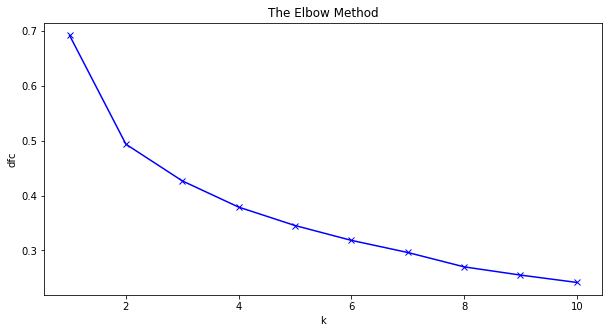

In [36]:
plt.figure(figsize=(10,5))
plt.plot(K, dfc, 'bx-')
plt.xlabel('k')
plt.ylabel('dfc')
plt.title('The Elbow Method')
plt.show()

In [37]:
kclusters=4

clf = KMeansConstrained(n_clusters=kclusters, size_min=4, random_state=0).fit(grouped_clustering)
clf.labels_[0:10]

array([0, 0, 0, 0, 0, 2, 0, 2, 0, 1], dtype=int32)

In [38]:
venues_sorted.insert(0, 'Cluster Labels', clf.labels_)

merged = df

merged = merged.join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')

merged.head() 

Neighborhood   Latitude  Longitude  Cluster Labels  \
0    Travis Country  30.251699 -97.830134               3   
1   Central Oakland  40.440680 -79.954233               1   
2     North Oakland  40.445841 -79.948393               1   
3      West Oakland  40.441244 -79.962611               1   
4  Crawford-Roberts  40.440387 -79.981348               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0        Sandwich Place            Taco Place                 Trail   
1           Coffee Shop        Ice Cream Shop   American Restaurant   
2           Coffee Shop        Ice Cream Shop         Grocery Store   
3           Coffee Shop        Ice Cream Shop               Brewery   
4   American Restaurant                 Hotel                   Bar   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0          Burger Joint         Grocery Store           Pizza Place   
1                Bakery                 Hotel                  Park   
2          Cocktail Bar                Bakery   American Restaurant   
3                 Hotel   American Restaurant                 Diner   
4        Ice Cream Shop           Coffee Shop        Sandwich Place   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0           Coffee Shop    Mexican Restaurant             Pet Store   
1         Grocery Store          Cocktail Bar           Pizza Place   
2               Brewery                  Park       Thai Restaurant   
3       Thai Restaurant         Grocery Store          Concert Hall   
4       Thai Restaurant         Grocery Store        History Museum   

  10th Most Common Venue  
0         Cosmetics Shop  
1                Brewery  
2            Pizza Place  
3              Gastropub  
4     Italian Restaurant

In [39]:
merged.sort_values(by=['Cluster Labels'], inplace=True)
merged

Neighborhood   Latitude  Longitude  Cluster Labels  \
36           Duquesne Heights  40.438601 -80.026100               0   
29                  Troy Hill  40.461181 -79.985995               0   
30             East Allegheny  40.457260 -79.997654               0   
84                     Esplen  40.462746 -80.050843               0   
83                Middle Hill  40.445972 -79.977695               0   
40                 Manchester  40.457870 -80.026459               0   
89       California-Kirkbride  40.459942 -80.021866               0   
46                North Shore  40.449658 -79.998110               0   
47                    Bon Air  40.407725 -80.001223               0   
51                  Arlington  40.413833 -79.963270               0   
52                  St. Clair  40.408803 -79.972187               0   
28              Spring Garden  40.460057 -79.991520               0   
53                 Mt. Oliver  40.410874 -79.979374               0   
56             Allegheny West  40.450784 -80.014403               0   
57                    Elliott  40.440020 -80.040971               0   
59                  Knoxville  40.410936 -79.993174               0   
60           Allegheny Center  40.451577 -80.005340               0   
61           Brighton Heights  40.486587 -80.029723               0   
62            Crafton Heights  40.449631 -80.056928               0   
64                    Chateau  40.451815 -80.028051               0   
65          Arlington Heights  40.416880 -79.961521               0   
67            Terrace Village  40.441658 -79.976462               0   
68          Bedford Dwellings  40.451237 -79.974580               0   
55                South Shore  40.436630 -80.010270               0   
27          Central Northside  40.458491 -80.012007               0   
72         Marshall-Shadeland  40.465923 -80.045888               0   
5              Strip District  40.454500 -79.981276               0   
17          South Side Slopes  40.424903 -79.987610               0   
6   Central Business District  40.440678 -79.989212               0   
4            Crawford-Roberts  40.440387 -79.981348               0   
18                      Bluff  40.436900 -79.990399               0   
13                Beltzhoover  40.419736 -79.999162               0   
12                   Westwood  40.432010 -80.053037               0   
19                   Fineview  40.464157 -80.003941               0   
16                  Allentown  40.419192 -79.992731               0   
15           South Side Flats  40.430258 -79.992242               0   
11                Perry North  40.481898 -80.010870               0   
10          Northview Heights  40.477638 -80.002595               0   
8                 Perry South  40.473397 -80.009734               0   
87                  Ridgemont  40.427069 -80.034480               0   
7       Spring Hill-City View  40.463216 -79.994168               0   
24           Mount Washington  40.424709 -80.001128               0   
88                   West End  40.440883 -80.035707               0   
9                 Summer Hill  40.492217 -80.008112               1   
58                  Shadyside  40.451092 -79.947300               1   
14      Central Lawrenceville  40.473082 -79.948876               1   
50                 Friendship  40.459296 -79.935105               1   
63                Polish Hill  40.458604 -79.961301               1   
38              Highland Park  40.478021 -79.919586               1   
66        Squirrel Hill North  40.442730 -79.943582               1   
2               North Oakland  40.445841 -79.948393               1   
41        Upper Lawrenceville  40.481811 -79.947774               1   
39                   Garfield  40.467242 -79.943370               1   
1             Central Oakland  40.440680 -79.954233               1   
82                 Upper Hill  40.450723 -79.959136               1   
33                 Bloomfield  40.461731 

In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged['Latitude'], merged['Longitude'], merged['Neighborhood'], merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters